In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
df = pd.read_csv('../data/telco_customer_churn.csv')

Minimal Preprocessing for Direct Modelling

In [3]:
df_clean = df.copy()
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(df_clean['TotalCharges'].median())

Encoding

In [4]:
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

Encode categorical features with LabelEncoder

In [5]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.drop('customerID')
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

Data Split

In [6]:
X = df_clean.drop(['customerID', 'Churn'], axis=1)
y = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Model for Direct Modelling

=== DIRECT MODELING - 3 MODEL ===


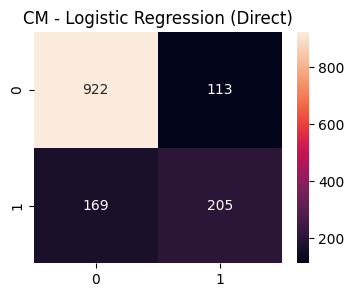

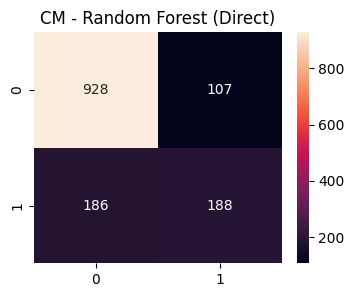

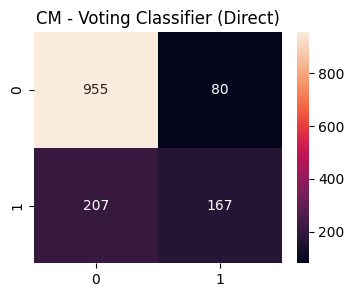

In [7]:
print("=== DIRECT MODELING - 3 MODEL ===")

# 1. Model Konvensional: Logistic Regression
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 2. Ensemble Bagging: Random Forest  
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. Ensemble Voting: Gabungan 3 model
voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=5000)),
        ('knn', KNeighborsClassifier()),
        ('svm', SVC(probability=True))
    ],
    voting='soft'
)
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Evaluasi
models = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf), 
    ('Voting Classifier', y_pred_voting)
]

results = []
for name, y_pred in models:
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }
    results.append(metrics)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'CM - {name} (Direct)')
    plt.savefig(f'cm_direct_{name.replace(" ", "_")}.png')
    plt.show()